In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Get necessary libraries

In [1]:
!pip install -Uqq fastbook
!pip install -Uqq duckduckgo_search


In [2]:
from fastbook import *
from fastai.vision.widgets import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
import fastai
from duckduckgo_search import DDGS
from fastdownload import download_url
from fastcore.all import *
from fastai.vision.all import *
from time import sleep

Define functions to get images:

In [5]:
def find_images(prompt, max_images=1):
    print(f"Searching for image: {prompt}")
    return L(DDGS().images(prompt, max_results=max_images)).itemgot('image')


In [6]:
# run the find_images() function
# replace arguments as needed
test_img = find_images('grizzly bear', max_images=1)
test_img

Searching for image: grizzly bear


(#1) ['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg']

In [8]:
# download test
dest = 'images/grizzly.jpg'
path = Path('images')
if not path.exists():
    path.mkdir()
download_images(dest, urls=test_img)


Use fastai's download_images() to download all of the urls for each of the necessary search terms.

In [10]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [16]:
download_images

<function fastai.vision.utils.download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False)>

In [11]:
if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path / o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=find_images(f'{o} bear', max_images=150))
    sleep(10)

Searching for image: grizzly bear
Searching for image: black bear
Searching for image: teddy bear


--- Test for image directories ---

Test for image directories

In [28]:
import os
current_directory = os.getcwd()
print(current_directory)
bears_directory = current_directory + '/bears'
print(bears_directory)
contents = os.listdir(bears_directory)
contents

/kaggle/working
/kaggle/working/bears


['black', 'grizzly', 'teddy']

Folder has image files

In [41]:
??get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      /opt/conda/lib/python3.10/site-packages/fastai/data/transforms.py
Type:      function

In [12]:
fns = get_image_files(path)
fns

(#429) [Path('bears/teddy/420770c1-b73c-4ec5-b041-0323d09a6bd1.jpg'),Path('bears/teddy/e0d515af-40f2-4a1e-91d1-8bb344e17c77.jpg'),Path('bears/teddy/af38dc8f-899c-4085-b133-4efb855166f7.jpg'),Path('bears/teddy/68d73972-bc1b-48c6-b49c-af51964fa11a.jpg'),Path('bears/teddy/4a8942ca-51aa-4fcc-8123-cfdc3d5f04bb.jpg'),Path('bears/teddy/cd49d87a-68bd-4255-9153-0aa1ee8460c4.png'),Path('bears/teddy/936a2008-a4e3-43d7-8782-86900bd354d8.jpg'),Path('bears/teddy/79ad5516-a067-4f4b-b477-fd97ea903636.jpg'),Path('bears/teddy/096b640d-bc18-4c82-8ae1-fdfc1812ba8a.jpeg'),Path('bears/teddy/81a5092e-7286-4ea4-a8b0-040513ee882e.jpg')...]

Check for corrupt image downloads.

In [13]:
failed = []
failed = verify_images(fns)
num_failed = len(failed)
print(type(failed))
print(num_failed)
failed

<class 'fastcore.foundation.L'>
13


(#13) [Path('bears/teddy/8b8109ef-8d13-4cb9-b67e-12b9c115ed8e.jpg'),Path('bears/teddy/3f0fd0d9-c365-49c5-b45b-f01617f78f21.JPG'),Path('bears/teddy/00af413d-f048-4318-b04c-c296488745f5.jpg'),Path('bears/teddy/354e6726-2c30-4910-8c6b-2e0971288b4f.jpg'),Path('bears/teddy/a92382e7-1ac9-4e40-aca0-525b788add29.jpg'),Path('bears/teddy/e5964544-f796-4b0f-b4a2-53fd89183716.jpg'),Path('bears/teddy/8526ed05-b85f-474b-ad8d-e00e0a83f77d.jpg'),Path('bears/teddy/a75c2a00-e072-4093-961a-0bdb7c0a6813.jpg'),Path('bears/teddy/ca639a5a-7c90-47fd-90d9-e3410349d61f.JPG'),Path('bears/grizzly/0ae05c5c-3f64-407e-8a23-72ef96f9329e.jpg')...]

Remove the failed images using 'unlink' on each of them.
Remember: most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection.

In [14]:
if num_failed != 0:
    failed.map(Path.unlink)
    print(f'Removed {num_failed} files.')
else:
    print('All files verified.')

Removed 13 files.


### Create DataLoaders

Using fastai dat block API

In [15]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256)
)

In [16]:
dls = bears.dataloaders(path)

## Example Image Resize and treat methods

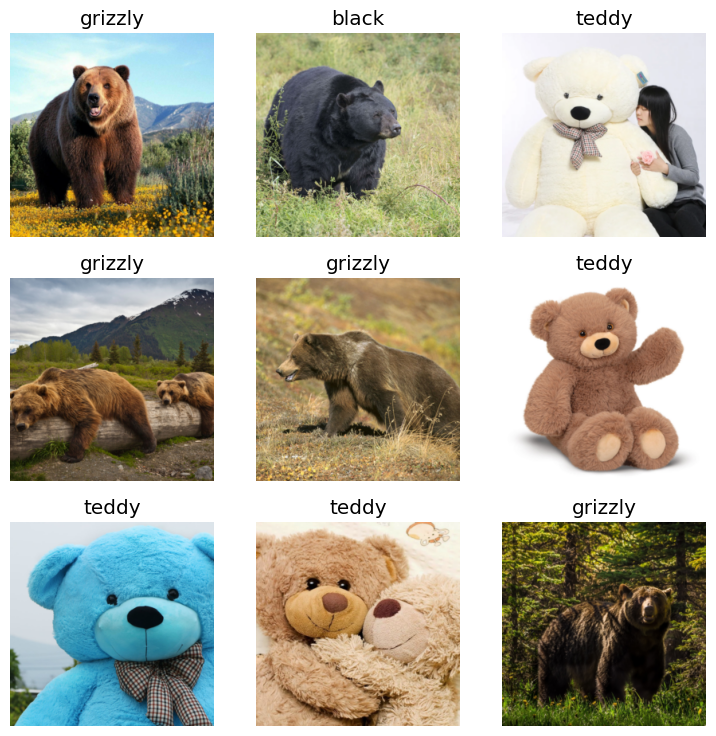

In [18]:
dls.valid.show_batch(max_n=9, nrows=3)

Resize the images so that all data fits and nothing is cropped using squish

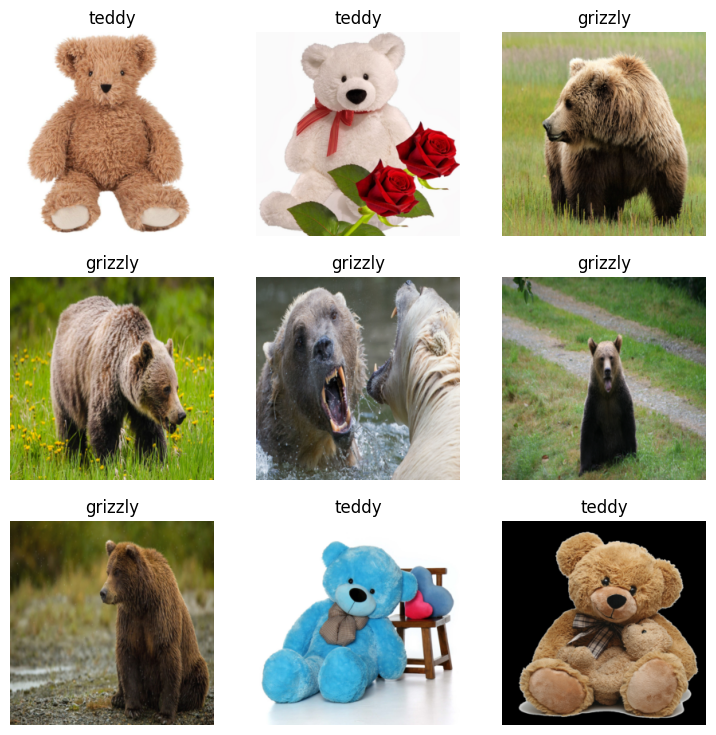

In [87]:
bears = bears.new(item_tfms=Resize(256, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=9, nrows=3)

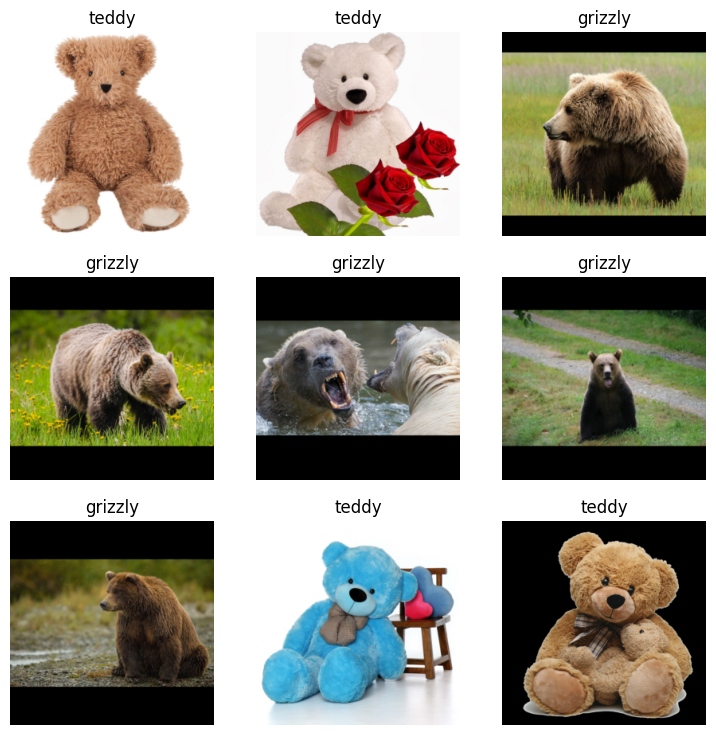

In [88]:
bears = bears.new(item_tfms=Resize(256, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=9, nrows=3)

In [19]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

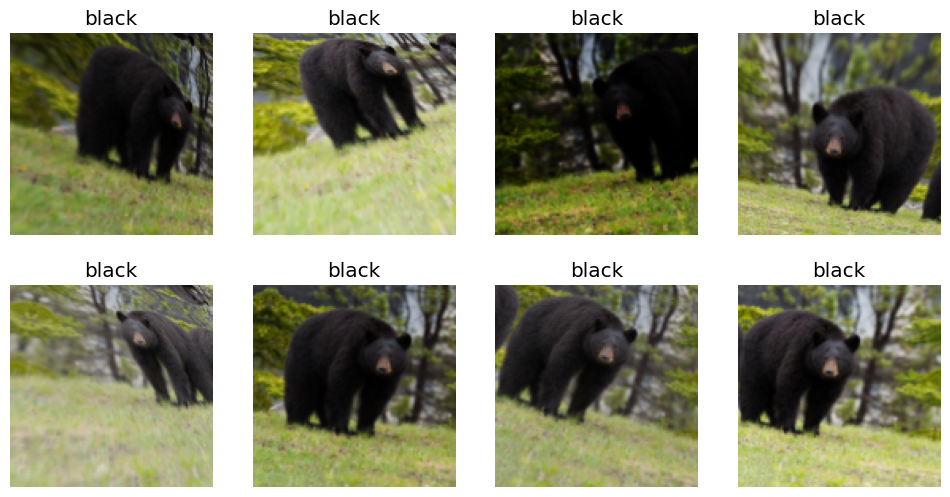

In [40]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Preparing Images for Model Training
Using RandomResizedCrop

In [28]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = bears.dataloaders(path)

Create "Learner" and fine-tune it the usual way:

In [29]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Visualize model mistakes using **Confusion Matrix**

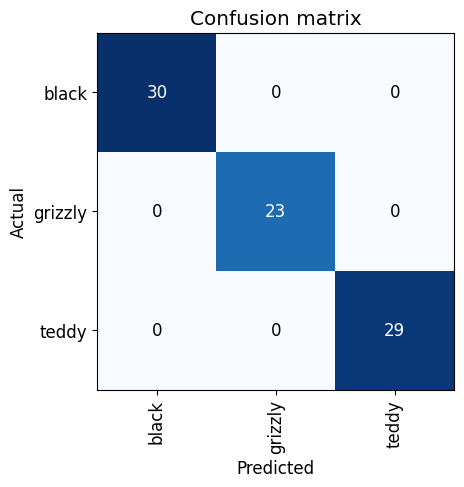

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

'plot_top_losses' shows the images with the hightest loss in the dataset.  Each image is labeled with four things: prediction, actual (target label), loss, and probability.  *probability* is the confidence level, from zero to one, theat the model ahs assignerd to its prediction.

In [31]:
interp.plot_top_losses(6, nrows=2)

fastai includes a handy GUI for data cleaning called **ImageClssifierCleaner** that allows you to choose a catefory and the training versus validation set and view the hightwt-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [21]:
cleaner = ImageClassifierCleaner(learn)
cleaner

to delete ( unlink ) all images selected for deletion, run:

In [27]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

FileNotFoundError: [Errno 2] No such file or directory: 'bears/teddy/469332b4-18af-4702-b75b-6823e2712a4f.jpg'

to move images for which we've selected a different category, we would run:

In [53]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Using the model in an application (online)

Using the model for inverence


saving the model using export

In [32]:
learn.export()

check for the files

In [33]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

When we use a model for getting predictions, instead of training, we call it inference. To create our inference learner from the exported file, we use load_learner (in this case, this isn't really necessary, since we already have a working Learner in our notebook; we're just doing it here so you can see the whole process end-to-end):

In [35]:
learn_inf = load_learner(path/'export.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to predict:

In [43]:
prediction = learn_inf.predict('images/grizzly.jpg/f682bae3-0f75-44d2-9ac2-55e0c47bb697.jpg')
prediction

('grizzly', tensor(1), tensor([1.3836e-06, 1.0000e+00, 3.0810e-06]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

In [44]:
learn_inf.dls.vocab
prediction[2][1]

tensor(1.0000)

## Building the GUI
Using ipywidgets

First, need a file upload widget:

In [45]:
# hide_ouput
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Second, grab the image:

In [46]:
img = PILImage.create(btn_upload.data[-1])

Use output widget to display it:

In [48]:
# hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: 
    display(img.to_thumb(128,128))
out_pl

Output()

Then get the predictions:

In [56]:
pred,pred_idx,probs = learn_inf.predict(img)

and use a 'Label' to display them:

In [57]:
# hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9999')

Need a button to do the classification. Looks like the upload button:

In [54]:
# hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Also need a *click event handler*, a function that will be called when it's pressed.  Copy overt the lines of code from above:

In [55]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(256,256))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]: .04f}'
    
btn_run.on_click(on_click_classify)

Put all widgets in a vertical box ( VBox ) to complete our GUI:

In [59]:
# hide
# Putting back btn_uppload to a widget for next cell
btn_upload = widgets.FileUpload()

In [62]:
# hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

## Turning notebook into app

In [63]:
# hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

  Obtaining dependency information for voila from https://files.pythonhosted.org/packages/25/28/7b9d6c2597bd86b25936df550f9b88319ee79721f095c90dca822c053692/voila-0.5.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.8 MB/s eta 0:00:0000:0100:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.5 OK
